In [301]:
import torch
import torch
import torch.nn as nn
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.preprocessing import MinMaxScaler
import torch.utils.data as data

In [302]:
import os
import re

path = os.getcwd()
path = re.sub('05_LSTM', '01_Data Collection', path)#\\Result\\data_final
path = path + '\\Result\\data_final\\all_themes.csv'

In [303]:
data_old = pd.read_csv(path, index_col=0, header=0)
data_old.head(5)

,YearMonth,0_cop_paris_changement_accord,1_carbone_france_gaz effet de_émissions de,2_europe_union_bruxelles_émissions de,3_joe biden_américain_son_plan,4_macron_les villes_entreprises_dollars,5_bolsonaro_changement_brésil_ne,6_des glaciers_stations_les alpes_glaces,7_inondations_phénomènes_eaux_par le,8_bce_banque centrale_christine lagarde_politique monétaire,...,29_justin trudeau_justin_harper_oléoduc géant,30_les vins_bordeaux_vigne et du_viticole française,31_barrière_barrière de corail_récifs_récifs coralliens,32_rénovation_rénovation énergétique_électricité_énergie en france,33_bangladesh_les réfugiés climatiques_climatique crée plus_utilise étranger comme,34_tourisme est responsable_crémation_hébergement_voyages,35_concentrations de gaz_ppm_record_année les concentrations,36_stables_les émissions mondiales_vont continuer grimper_37 ici,37_climatique hydrogène vert_électrolyse_être produit_azotés,38_climatique notre_droit reste identifié_mouvements migratoires dans_monde gouverné en
0,2013-01,0.0,13.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2013-02,4.0,3.0,1.0,5.0,4.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
2,2013-03,6.0,0.0,1.0,3.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
3,2013-04,5.0,2.0,4.0,1.0,0.0,3.0,4.0,0.0,0.0,...,1.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0
4,2013-05,7.0,2.0,5.0,1.0,1.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0


In [304]:
column_list = list(data_old.columns)

In [305]:
data_old.columns

Index(['YearMonth', '0_cop_paris_changement_accord',
       '1_carbone_france_gaz effet de_émissions de',
       '2_europe_union_bruxelles_émissions de',
       '3_joe biden_américain_son_plan',
       '4_macron_les villes_entreprises_dollars',
       '5_bolsonaro_changement_brésil_ne',
       '6_des glaciers_stations_les alpes_glaces',
       '7_inondations_phénomènes_eaux_par le',
       '8_bce_banque centrale_christine lagarde_politique monétaire',
       '9_chinois_jinping_pic_la chine et',
       '10_émissions de_de gaz_effet de serre_gaz effet de',
       '11_déforestation_les forêts_pompiers_tropicales',
       '12_angela merkel_ses_chancelière_respecter ses engagements',
       '13_oiseaux_invasives_exotiques_pollution',
       '14_climat australie_incendies_abbott_par habitant',
       '15_énergie nucléaire_atome_nucléaire qui_japon',
       '16_premières victimes_enfants_santé mentale_pandémie',
       '17_vaches_de élevage_14 des_production de viande',
       '18_navires_le 

In [306]:
# Aggregate topics into themes

Causes_of_Solutions_to_Climate_Change = ['17_vaches_de élevage_14 des_production de viande',
                                         '18_navires_le diesel_volkswagen_constructeurs',
                                         '36_stables_les émissions mondiales_vont continuer grimper_37 ici',
                                         '37_climatique hydrogène vert_électrolyse_être produit_azotés',
                                         '10_émissions de_de gaz_effet de serre_gaz effet de',
                                         '15_énergie nucléaire_atome_nucléaire qui_japon',
                                         '32_rénovation_rénovation énergétique_électricité_énergie en france'
                                         ]
COPs = ['0_cop_paris_changement_accord']
Climate_Politics = ['1_carbone_france_gaz effet de_émissions de',
                    '2_europe_union_bruxelles_émissions de',
                    '3_joe biden_américain_son_plan',
                    '5_bolsonaro_changement_brésil_ne',
                    '8_bce_banque centrale_christine lagarde_politique monétaire',
                    '9_chinois_jinping_pic_la chine et',
                    '12_angela merkel_ses_chancelière_respecter ses engagements',
                    '29_justin trudeau_justin_harper_oléoduc géant',
                    '33_bangladesh_les réfugiés climatiques_climatique crée plus_utilise étranger comme',
                    '19_au moins 40_un esprit_40 les émissions_de justice sociale'
                    ]
Awareness  = ['27_communautés locales agissent_climatique vid_en croissance_économie circulaire est']
Impacts_on_humans = ['7_inondations_phénomènes_eaux_par le',
                     '14_climat australie_incendies_abbott_par habitant',
                     '16_premières victimes_enfants_santé mentale_pandémie',
                     '22_vanuatu_qui subit_petites îles_continent africain',
                     '25_famine_madagascar_kenya_milliards habitants',
                     '28_océans en_île_courants_du niveau des',
                     '30_les vins_bordeaux_vigne et du_viticole française',
                     '38_climatique notre_droit reste identifié_mouvements migratoires dans_monde gouverné en'
                     ]
Economic_Impacts = ['4_macron_les villes_entreprises_dollars',
                    '6_des glaciers_stations_les alpes_glaces',
                    '23_transport aérien_les avions_le kérosène_aéroport de',
                    '24_banques_les banques centrales_centrales_risques financiers',
                    '26_actionnaires_exxonmobil_pétrolier_majors',
                    '34_tourisme est responsable_crémation_hébergement_voyages'
                    ]
Climate_Science_Impacts_on_the_Ecosystem = ['11_déforestation_les forêts_pompiers_tropicales',
                                           '13_oiseaux_invasives_exotiques_pollution',
                                           '20_la plus chaude_copernicus_record_européen copernicus',
                                           '21_glaciologie_température_surface_années 1990 aux',
                                           '31_barrière_barrière de corail_récifs_récifs coralliens',
                                           '35_concentrations de gaz_ppm_record_année les concentrations']

In [307]:
data= data_old.copy()

In [308]:
# Create dataframe with time series for each theme

data['Causes of & Solutions to Climate Change'] = data_old[Causes_of_Solutions_to_Climate_Change].sum(axis=1)
data['COPs'] = data_old[COPs].sum(axis=1)
data['Climate Politics'] = data_old[Climate_Politics].sum(axis=1)
data['Awareness'] = data_old[Awareness].sum(axis=1)
data['Impacts on humans'] = data_old[Impacts_on_humans].sum(axis=1)
data['Economic Impacts'] = data_old[Economic_Impacts].sum(axis=1)
data['Climate Science & Impacts on the Ecosystem'] = data_old[Climate_Science_Impacts_on_the_Ecosystem].sum(axis=1)

In [314]:
# Keep only interesting columns for readability
data = data[['COPs',
             'Causes of & Solutions to Climate Change',
             'Climate Politics', 'Awareness',
             'Impacts on humans', 'Economic Impacts',
             'Climate Science & Impacts on the Ecosystem']]

In [315]:
data

,COPs,Causes of & Solutions to Climate Change,Climate Politics,Awareness,Impacts on humans,Economic Impacts,Climate Science & Impacts on the Ecosystem
0,0.0,1.0,20.0,0.0,0.0,1.0,0.0
1,4.0,2.0,12.0,0.0,0.0,6.0,0.0
2,6.0,3.0,6.0,0.0,0.0,2.0,0.0
3,5.0,1.0,16.0,0.0,1.0,5.0,1.0
4,7.0,3.0,15.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...
115,13.0,12.0,38.0,1.0,21.0,12.0,8.0
116,18.0,14.0,45.0,0.0,18.0,13.0,14.0
117,12.0,7.0,39.0,2.0,17.0,13.0,9.0
118,45.0,25.0,62.0,2.0,28.0,25.0,15.0


In [311]:
'''
data_choose = pd.DataFrame(columns= ['column', 'mean', 'median'])

i=0
for column_i in column_list[1:]:
    
    mean_i = np.mean(data[column_i])
    median_i = np.median(data[column_i])
    data_choose.loc[i] = [column_i, mean_i, median_i]
    i=i+1

    
data_choose.head()

column_choose = list(data_choose[(data_choose['median'] >1)
                                 &(data_choose['mean'] >2)]['column'])

column_choose

data_new = data[column_choose]

data_new.tail()

'''

"\ndata_choose = pd.DataFrame(columns= ['column', 'mean', 'median'])\n\ni=0\nfor column_i in column_list[1:]:\n    \n    mean_i = np.mean(data[column_i])\n    median_i = np.median(data[column_i])\n    data_choose.loc[i] = [column_i, mean_i, median_i]\n    i=i+1\n\n    \ndata_choose.head()\n"

In [122]:
len(data_new)
# 120 rows
# training set 70%, testing set 30%
# training set 84, testing set 36

120

In [123]:
training = data_new[0:84]
training = training.reset_index(drop=True).copy()

In [124]:
testing = data_new[84:120]
testing = testing.reset_index(drop=True).copy()

In [125]:
training_series = []

for column_i in list(training.columns):
    
    training_series.append(list(training[column_i]))

In [126]:
testing_series = []

for column_i in list(testing.columns):
    
    testing_series.append(list(testing[column_i]))

In [127]:
# reform the training data

window = 12
L = len(training)
sequence = []

for i in range(L-window):
    sequence_i = []
    for j in range(window):
        sequence_i_j = []
        
        for k in training_series:
            sequence_i_j.append(k[i+j:i+j+1][0])
        
        sequence_i.append(sequence_i_j)
    sequence_i = torch.tensor(sequence_i)
    
    label_i = []
    for k in training_series:
        label_i.append(k[i+window:i+window+1][0])
    label_i = torch.tensor(label_i)
    
    sequence.append((sequence_i, label_i))

In [130]:
sequence[0]

tensor([[ 0., 13.,  5.,  2.,  1.,  0.,  0.,  1.],
        [ 4.,  3.,  1.,  5.,  4.,  0.,  0.,  2.],
        [ 6.,  0.,  1.,  3.,  0.,  0.,  0.,  2.],
        [ 5.,  2.,  4.,  1.,  0.,  0.,  0.,  0.],
        [ 7.,  2.,  5.,  1.,  1.,  0.,  0.,  1.],
        [ 7.,  2.,  5.,  5.,  0.,  1.,  1.,  1.],
        [ 3.,  0.,  2.,  1.,  0.,  0.,  0.,  0.],
        [ 5.,  4.,  0.,  2.,  2.,  0.,  1.,  0.],
        [14.,  6.,  3.,  1.,  2.,  0.,  3.,  2.],
        [ 2.,  0.,  2.,  3.,  0.,  0.,  0.,  0.],
        [ 2.,  3.,  5.,  0.,  0.,  5.,  2.,  4.],
        [ 0.,  2.,  1.,  2.,  1.,  1.,  2.,  2.]])

In [142]:
# reform the testing data

window = 12
L= len(testing)
sequence_test = []


for i in range(L-window):
    sequence_i = []
    
    for j in range(window):
        sequence_i_j = []
        
        for k in testing_series:
            sequence_i_j.append(k[i+j:i+j+1][0])
        
        sequence_i.append(sequence_i_j)
    sequence_i = torch.tensor(sequence_i)
    
    label_i = []
    for k in testing_series:
        label_i.append(k[i+window:i+window+1][0])
    label_i = torch.tensor(label_i)
    
    sequence_test.append((sequence_i, label_i))

In [143]:
# example
sequence_test[0]

(tensor([[28.,  6.,  5., 12.,  4.,  3.,  6.,  4.],
         [17.,  8.,  2.,  8.,  5.,  1.,  3.,  1.],
         [20.,  3.,  2.,  2.,  2.,  2.,  1.,  0.],
         [ 9.,  4.,  3.,  1.,  2.,  3.,  0.,  0.],
         [ 3.,  5.,  0.,  1.,  0.,  3.,  4.,  0.],
         [11.,  8.,  4.,  1.,  8.,  5.,  1.,  2.],
         [ 8., 12.,  1.,  6.,  2.,  3.,  2.,  1.],
         [ 9.,  1.,  1.,  1.,  1.,  3.,  2.,  4.],
         [17.,  9.,  1.,  2.,  4.,  3.,  6.,  0.],
         [ 6.,  5.,  3.,  3.,  1.,  5.,  5.,  2.],
         [12.,  5.,  3.,  3.,  1.,  4.,  1.,  0.],
         [20., 10.,  6.,  3.,  5.,  6.,  3.,  6.]]),
 tensor([7., 1., 2., 3., 3., 4., 3., 3.]))

In [144]:
# model

class Model(nn.Module):
    
    def __init__(self, input_size=1, hidden_size=100, output_size=1, num_layers=1):
        
        super(Model, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
        self.linear = nn.Linear(hidden_size, output_size)
        
        self.hidden_cell = (torch.zeros(1,1,self.hidden_size),
                            torch.zeros(1,1,self.hidden_size))
    
    #  methods 
    def forward(self, x):
        
        out, self.hidden_cell = self.lstm(x)
        out = self.linear(out.view(len(x), -1))
        
        return out[-1]


In [177]:
# parameters

input_size = 8
hidden_size = 100 
output_size = 8
num_layers = 2

model = Model(input_size, hidden_size, output_size, num_layers)

In [167]:
epochs = 302
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

loss_list = []

for i in range(epochs):
    
    model.train()
    for seq, labels in sequence:
        
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_size),
                             torch.zeros(1, 1, model.hidden_size))
 
        y_pred = model(seq)
 
        loss_i = loss_function(y_pred, labels)
        loss_i.backward()
        optimizer.step()
 
    if i%25 == 1:
        
        print(f'epoch: {i:3} loss: {loss_i.item():10.8f}')
        loss_list.append(loss_i.item())

epoch:   1 loss: 86.52452087
epoch:  26 loss: 30.58534431
epoch:  51 loss: 12.75733757
epoch:  76 loss: 4.35452318
epoch: 101 loss: 1.94296920
epoch: 126 loss: 0.59965467
epoch: 151 loss: 0.07478507
epoch: 176 loss: 0.04895931
epoch: 201 loss: 0.04887675
epoch: 226 loss: 0.06632499
epoch: 251 loss: 0.05448116
epoch: 276 loss: 0.00483020
epoch: 301 loss: 0.00492845


In [48]:
model.parameters

<bound method Module.parameters of Model(
  (lstm): LSTM(8, 100, num_layers=2)
  (linear): Linear(in_features=100, out_features=8, bias=True)
)>

In [168]:
with torch.no_grad():
    real = []
    prediction = []
    for seq, labels in sequence:
        
        real.append(labels)
        prediction.append(model(seq))
        

In [170]:
real[0]

tensor([3., 3., 4., 9., 0., 0., 1., 1.])

In [172]:
prediction[0]

tensor([ 3.1295e+00,  3.1533e+00,  4.0583e+00,  9.0491e+00, -6.3561e-03,
         1.0077e-02,  1.1273e+00,  9.8761e-01])

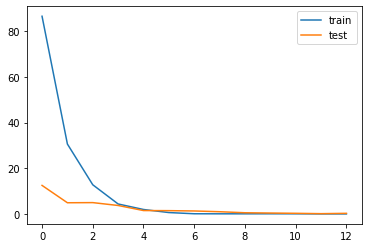

In [179]:
plt.plot(loss_list, label='train')
plt.plot(loss_list_test, label='test')
plt.legend()
plt.show()

In [178]:
epochs = 302
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

loss_list_test = []

for i in range(epochs):
    
    model.train()
    for seq, labels in sequence_test:
        
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_size),
                             torch.zeros(1, 1, model.hidden_size))
 
        y_pred = model(seq)
 
        loss_i = loss_function(y_pred, labels)
        loss_i.backward()
        optimizer.step()
 
    if i%25 == 1:
        
        print(f'epoch: {i:3} loss: {loss_i.item():10.8f}')
        loss_list_test.append(loss_i.item())

epoch:   1 loss: 12.48246574
epoch:  26 loss: 4.88859940
epoch:  51 loss: 4.95228672
epoch:  76 loss: 3.69707394
epoch: 101 loss: 1.47506452
epoch: 126 loss: 1.43531275
epoch: 151 loss: 1.29185534
epoch: 176 loss: 0.96668202
epoch: 201 loss: 0.51267290
epoch: 226 loss: 0.38495001
epoch: 251 loss: 0.26996189
epoch: 276 loss: 0.11531334
epoch: 301 loss: 0.26192239


In [316]:
series = []

for column_i in list(data.columns):
    
    series.append(list(data[column_i]))

In [319]:
#print(series)

In [320]:
window = 12
L = len(data)
sequence = []

for i in range(L-window):
    sequence_i = []
    for j in range(window):
        sequence_i_j = []
        
        for k in series:
            sequence_i_j.append(k[i+j:i+j+1][0])
        
        sequence_i.append(sequence_i_j)
    sequence_i = torch.tensor(sequence_i)
    
    label_i = []
    for k in series:
        label_i.append(k[i+window:i+window+1][0])
    label_i = torch.tensor(label_i)
    
    sequence.append((sequence_i, label_i))

In [ ]:
# sequence

In [322]:
# parameters

input_size = 7
hidden_size = 100 
output_size = 7
num_layers = 2

model = Model(input_size, hidden_size, output_size, num_layers)

In [323]:
epochs = 302
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

loss_list = []

for i in range(epochs):
    
    model.train()
    for seq, labels in sequence:
        
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_size),
                             torch.zeros(1, 1, model.hidden_size))
 
        y_pred = model(seq)
 
        loss_i = loss_function(y_pred, labels)
        loss_i.backward()
        optimizer.step()
 
    if i%25 == 1:
        
        print(f'epoch: {i:3} loss: {loss_i.item():10.8f}')
        loss_list_test.append(loss_i.item())

epoch:   1 loss: 48.71826172
epoch:  26 loss: 25.51786804
epoch:  51 loss: 11.22958660
epoch:  76 loss: 11.71919346
epoch: 101 loss: 27.62040138
epoch: 126 loss: 12.01164055
epoch: 151 loss: 11.92298126
epoch: 176 loss: 5.84515142
epoch: 201 loss: 4.25138569
epoch: 226 loss: 5.19331312
epoch: 251 loss: 2.02388430
epoch: 276 loss: 1.00733995
epoch: 301 loss: 0.46756846


In [205]:
model.parameters

<bound method Module.parameters of Model(
  (lstm): LSTM(8, 100, num_layers=2)
  (linear): Linear(in_features=100, out_features=8, bias=True)
)>

In [324]:
real_value = []
predicted_value = []

for seq, labels in sequence:
    
    predicted_value.append(model(seq).tolist())
    real_value.append(labels.tolist())
    

In [422]:
time_series_1 = []
time_series_1_predicted = []
time_series_2 = []
time_series_2_predicted = []
time_series_3 = []
time_series_3_predicted = []
time_series_4 = []
time_series_4_predicted = []
time_series_5 = []
time_series_5_predicted = []
time_series_6 = []
time_series_6_predicted = []
time_series_7 = []
time_series_7_predicted = []

for i in range(len(predicted_value)):
    
    time_series_1.append(real_value[i][0])
    time_series_1_predicted.append(predicted_value[i][0])
    
    time_series_2.append(real_value[i][1])
    time_series_2_predicted.append(predicted_value[i][1])
    
    time_series_3.append(real_value[i][2])
    time_series_3_predicted.append(predicted_value[i][2])
    
    time_series_4.append(real_value[i][3])
    time_series_4_predicted.append(predicted_value[i][3])
    
    time_series_5.append(real_value[i][4])
    time_series_5_predicted.append(predicted_value[i][4])
    
    time_series_6.append(real_value[i][5])
    time_series_6_predicted.append(predicted_value[i][5])
    
    time_series_7.append(real_value[i][6])
    time_series_7_predicted.append(predicted_value[i][6])
    


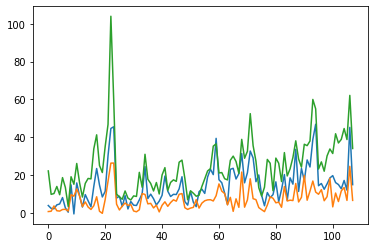

In [423]:
plt.plot(time_series_1_predicted, label='train')
plt.plot(time_series_2_predicted, label='test')
plt.plot(time_series_3_predicted, label='test')

In [424]:
data

,COPs,Causes of & Solutions to Climate Change,Climate Politics,Awareness,Impacts on humans,Economic Impacts,Climate Science & Impacts on the Ecosystem
0,0.0,1.0,20.0,0.0,0.0,1.0,0.0
1,4.0,2.0,12.0,0.0,0.0,6.0,0.0
2,6.0,3.0,6.0,0.0,0.0,2.0,0.0
3,5.0,1.0,16.0,0.0,1.0,5.0,1.0
4,7.0,3.0,15.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...
115,13.0,12.0,38.0,1.0,21.0,12.0,8.0
116,18.0,14.0,45.0,0.0,18.0,13.0,14.0
117,12.0,7.0,39.0,2.0,17.0,13.0,9.0
118,45.0,25.0,62.0,2.0,28.0,25.0,15.0


In [425]:
35

35

In [449]:
# january in 2016
# increase 10


data_1 = data.copy()
data_1.iloc[:,0] = data_1.iloc[:,0] /2

series_1 = []

for column_i in list(data_1.columns):
    
    series_1.append(list(data_1[column_i]))
    

window = 12
L = len(data_1)
sequence_1 = []

for i in range(L-window):
    sequence_i = []
    for j in range(window):
        sequence_i_j = []
        
        for k in series_1:
            sequence_i_j.append(k[i+j:i+j+1][0])
        
        sequence_i.append(sequence_i_j)
    sequence_i = torch.tensor(sequence_i)
    
    label_i = []
    for k in series_1:
        label_i.append(k[i+window:i+window+1][0])
    label_i = torch.tensor(label_i)
    
    sequence_1.append((sequence_i, label_i))

In [450]:
changed_value = []

for seq, labels in sequence_1:
    
    changed_value.append(model(seq).tolist())

In [451]:
time_series_1_changed = []
time_series_2_changed = []
time_series_3_changed = []
time_series_4_changed = []
time_series_5_changed = []
time_series_6_changed = []
time_series_7_changed = []

for i in range(len(predicted_value)):
    
    time_series_1_changed.append(predicted_value[i][0] /2)
    
    time_series_2_changed.append(changed_value[i][1])
    
    time_series_3_changed.append(changed_value[i][2])
    
    time_series_4_changed.append(changed_value[i][3])
    
    time_series_5_changed.append(changed_value[i][4])
    
    time_series_6_changed.append(changed_value[i][5])
    
    time_series_7_changed.append(changed_value[i][6])

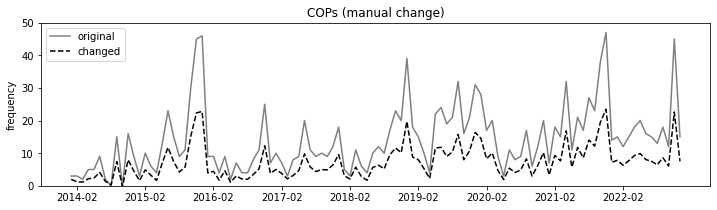

In [452]:
plt.figure(figsize=(12, 3))

plt.plot(list(data_old['YearMonth'])[-108:],
         time_series_1, 
         color='black', linestyle='-', 
         alpha=0.5, label='original')
plt.plot(time_series_1_changed, 
         color='black', linestyle='--', 
         label='changed')

plt.xticks(range(1,108,12))
plt.ylim(0,50)

plt.ylabel('frequency')
plt.title(data.columns[0] + ' (manual change)')

plt.legend()
plt.show()



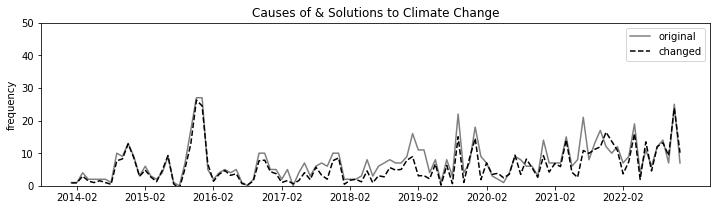

In [453]:
plt.figure(figsize=(12, 3))

plt.plot(list(data_old['YearMonth'])[-108:],
         time_series_2, 
         color='black', linestyle='-', 
         alpha=0.5, label='original')
plt.plot(time_series_2_changed, 
         color='black', linestyle='--', 
         label='changed')

plt.xticks(range(1,108,12))
plt.ylim(0,50)

plt.ylabel('frequency')
plt.title(data.columns[1])

plt.legend()
plt.show()


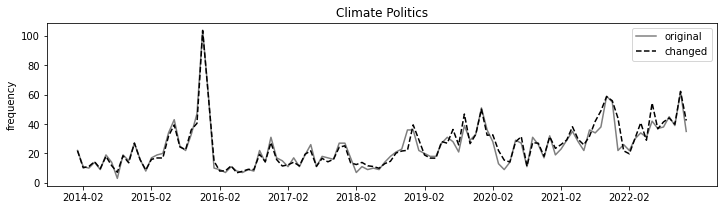

In [454]:
plt.figure(figsize=(12, 3))

plt.plot(list(data_old['YearMonth'])[-108:],
         time_series_3, 
         color='black', linestyle='-', 
         alpha=0.5, label='original')
plt.plot(time_series_3_changed, 
         color='black', linestyle='--', 
         label='changed')

plt.xticks(range(1,108,12))

plt.ylabel('frequency')
plt.title(data.columns[2])

plt.legend()
plt.show()


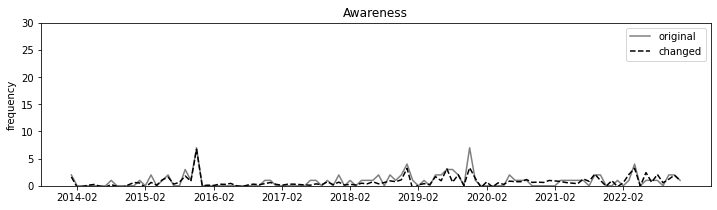

In [455]:
plt.figure(figsize=(12, 3))

plt.plot(list(data_old['YearMonth'])[-108:],
         time_series_4, 
         color='black', linestyle='-', 
         alpha=0.5, label='original')
plt.plot(time_series_4_changed, 
         color='black', linestyle='--', 
         label='changed')

plt.xticks(range(1,108,12))
plt.ylim(0,30)

plt.ylabel('frequency')
plt.title(data.columns[3])

plt.legend()
plt.show()


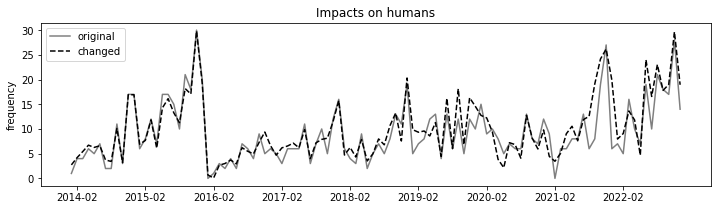

In [456]:
plt.figure(figsize=(12, 3))

plt.plot(list(data_old['YearMonth'])[-108:],
         time_series_5, 
         color='black', linestyle='-', 
         alpha=0.5, label='original')
plt.plot(time_series_5_changed, 
         color='black', linestyle='--', 
         label='changed')

plt.xticks(range(1,108,12))

plt.ylabel('frequency')
plt.title(data.columns[4])

plt.legend()
plt.show()

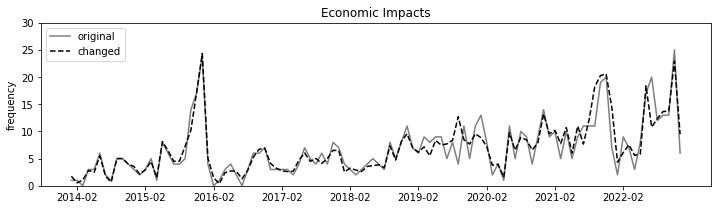

In [457]:
plt.figure(figsize=(12, 3))

plt.plot(list(data_old['YearMonth'])[-108:],
         time_series_6, 
         color='black', linestyle='-', 
         alpha=0.5, label='original')
plt.plot(time_series_6_changed, 
         color='black', linestyle='--', 
         label='changed')

plt.xticks(range(1,108,12))
plt.ylim(0,30)

plt.ylabel('frequency')
plt.title(data.columns[5])

plt.legend()
plt.show()

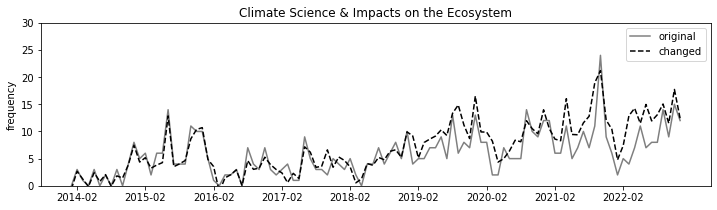

In [458]:
plt.figure(figsize=(12, 3))

plt.plot(list(data_old['YearMonth'])[-108:],
         time_series_7, 
         color='black', linestyle='-', 
         alpha=0.5, label='original')
plt.plot(time_series_7_changed, 
         color='black', linestyle='--', 
         label='changed')

plt.xticks(range(1,108,12))
plt.ylim(0,30)

plt.ylabel('frequency')
plt.title(data.columns[6])

plt.legend()
plt.show()